In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
# Load The data
data = pd.read_csv('/content/Fifa 23 Players Data.csv')

In [4]:
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


Basic Data Cleaning and EDA

In [5]:
# Check Missing Values
data[data.isna().any(axis=1)]  # No na

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating


In [8]:
data.keys()

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [6]:
data.shape

(18539, 89)

QUESTIONS

In [9]:
# 1. Player with the highest market value
data[data['Value(in Euro)'] == data['Value(in Euro)'].max()]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [10]:
# 2. Check the correlation between age and players overall performance
data['Age'].corr(data['Overall'])

np.float64(0.44236890623579744)

There is a weak positive correlation of 0.44 between players age and overall performance

In [12]:
# 3. Which nationality dominates in overall
data.groupby('Nationality')['Overall'].max().sort_values(ascending=False)

,Overall
Nationality,
Argentina,91
Belgium,91
Poland,91
France,91
Egypt,90
...,...
Gibraltar,59
Indonesia,58
South Sudan,56


Argentina, Belgium, Poland and France are the joint top ranked nation in the FIFA Overall ranking

In [14]:
# 4. Correlation of players speed and value
data['Sprint Speed'].corr(data['Value(in Euro)'])

np.float64(0.16674338713611903)

In [15]:
# 4. Correlation of players Shooting and value
data['Shot Power'].corr(data['Value(in Euro)'])

np.float64(0.3034844324813664)

In [16]:
# 4. Correlation of players passing and value
data['Passing Total'].corr(data['Value(in Euro)'])

np.float64(0.39998470686638654)

Players' passing has a greater effect on their value than shotting power and sprint speed

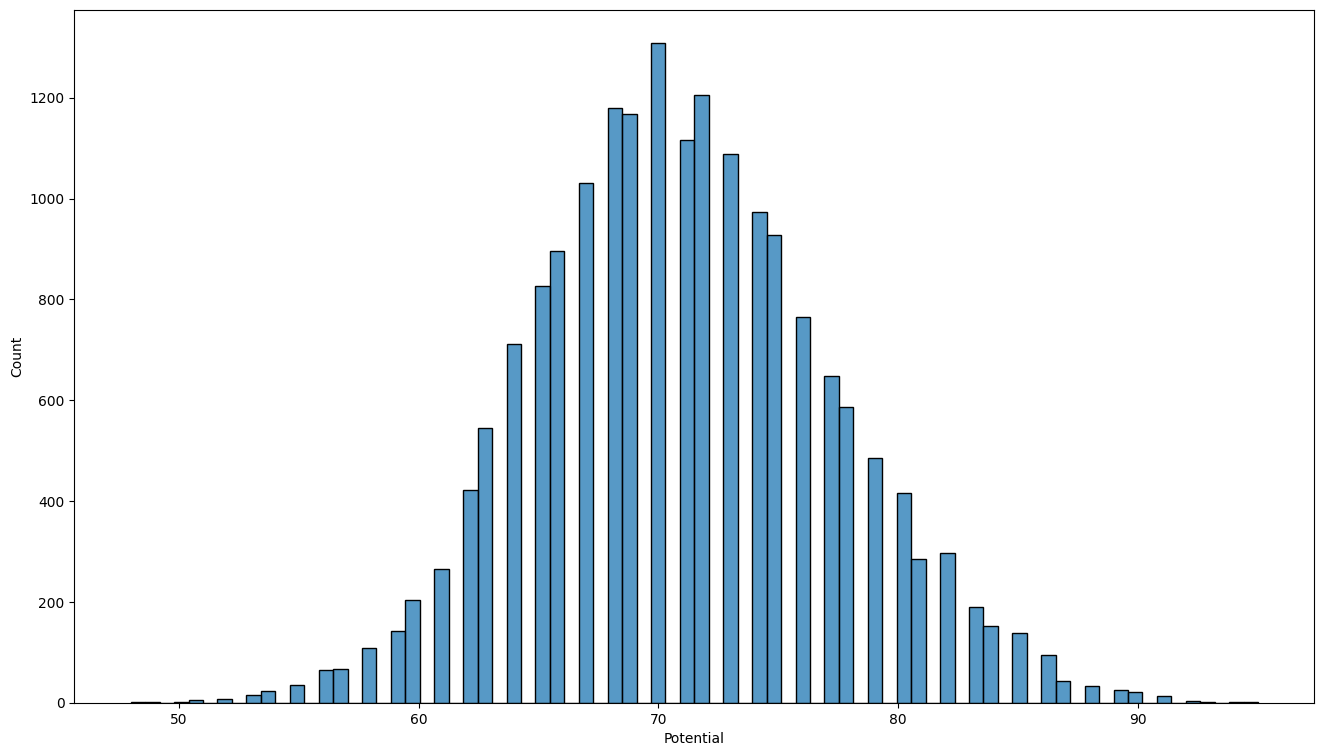

In [17]:
# Histogram of players potential and value
sns.histplot(data['Potential'])
plt.show()

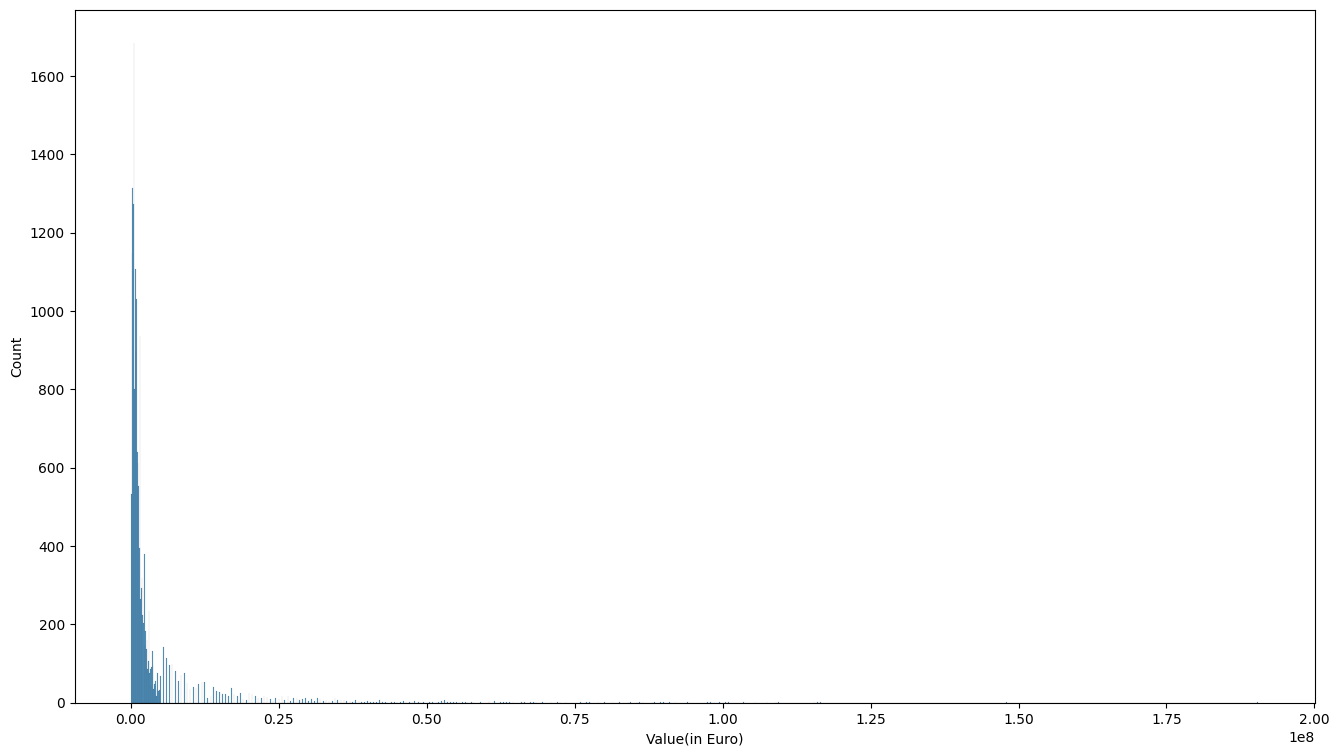

In [18]:
sns.histplot(data['Value(in Euro)'])
plt.show()

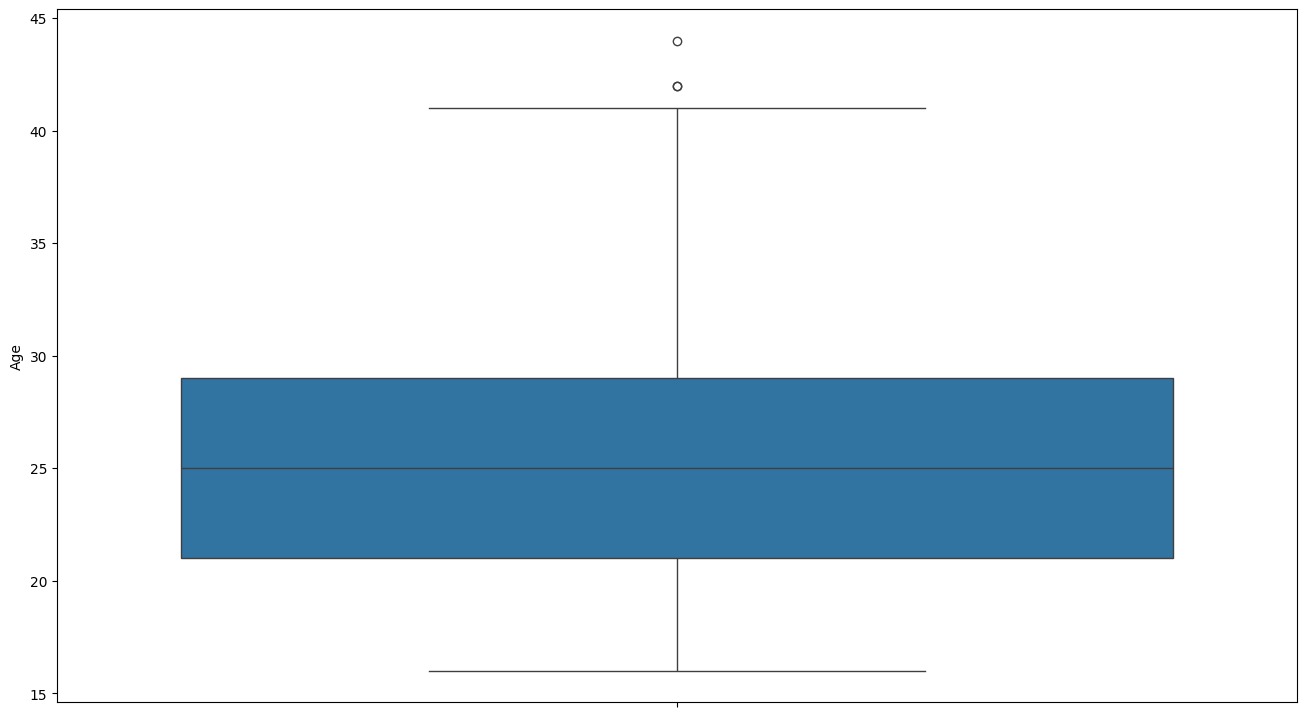

In [20]:
# Box plot of players age
sns.boxplot(data['Age'])
plt.show()

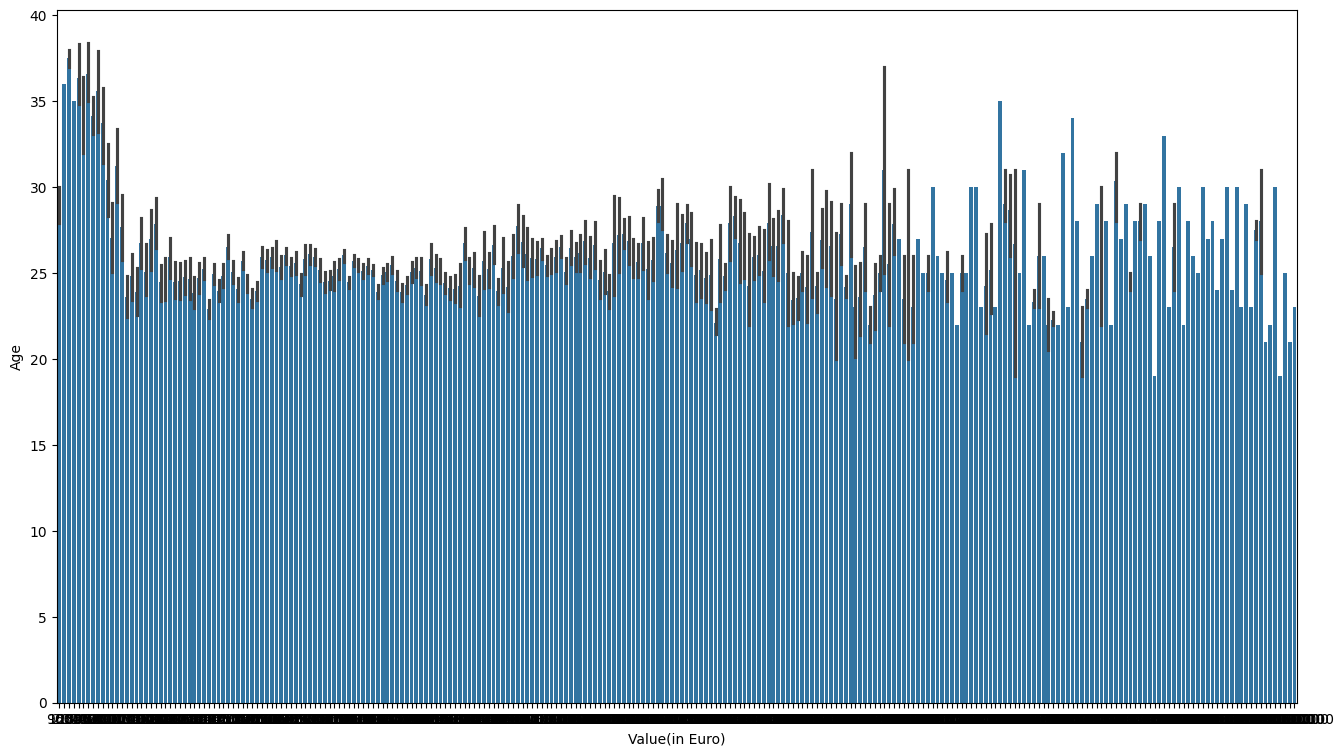

In [22]:
# Barplot showing players agaisnt value
sns.barplot(x=data['Value(in Euro)'], y=data['Age'], data = data)
plt.show()

Regression Model To predict Players value

In [23]:
# Create a new dataframe based on 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating', 'GK Rating', 'Value(in Euro)'

new_data = data[['LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating', 'GK Rating', 'Value(in Euro)'
]]

In [24]:
new_data.head()


,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,GK Rating,Value(in Euro)
0,90,91,91,91,90,22,54000000
1,87,89,89,89,87,21,64000000
2,85,88,88,88,85,22,84000000
3,88,87,87,87,88,24,107500000
4,90,90,90,90,90,21,190500000


In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LW Rating       18539 non-null  int64
 1   LF Rating       18539 non-null  int64
 2   CF Rating       18539 non-null  int64
 3   RF Rating       18539 non-null  int64
 4   RW Rating       18539 non-null  int64
 5   GK Rating       18539 non-null  int64
 6   Value(in Euro)  18539 non-null  int64
dtypes: int64(7)
memory usage: 1014.0 KB


In [28]:
# Fit OLS to new_data
import statsmodels.api as sm
X = new_data.drop('Value(in Euro)', axis=1)
y = new_data['Value(in Euro)']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()


In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Value(in Euro)   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     1426.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:44:19   Log-Likelihood:            -3.1819e+05
No. Observations:               18539   AIC:                         6.364e+05
Df Residuals:                   18535   BIC:                         6.364e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.102e+07   3.83e+05    -54.886      0.000   -2.18e+07   -2.03e+07
LW Rating  -2.237e+04   1.73e+04     -1.295      0.195   -5.62e+04    1.15e+04
LF Rating    1.26e+05   1.15e+04     10.978      0.000    1.04e+05    1.49e+05
CF Rating    1.26e+05   1.15e+04     10.978      0.000    1.04e+05    1.49e+05
RF Rating    1.26e+05   1.15e+04     10.978      0.000    1.04e+05    1.49e+05
RW Rating  -2.237e+04   1.73e+04     -1.295      0.195   -5.62e+04    1.15e+04
GK Rating   2.291e+05   5097.284     44.936      0.000    2.19e+05    2.39e+05
==============================================================================
Omnibus:                    24794.759   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6865547.592
Skew:                           7.590   Prob(JB):                         0.00
Kurtosis:                      96.046   Cond. No.                     5.25e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
# Fit OLS to the scale_data
import statsmodels.api as sm
X = scaled_data[:, 1:]
y = scaled_data[:, 0]
X = sm.add_constant(X)
model_scaled = sm.OLS(y, X).fit()

In [32]:
model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.624e+34
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:46:11   Log-Likelihood:             6.3307e+05
No. Observations:               18539   AIC:                        -1.266e+06
Df Residuals:                   18534   BIC:                        -1.266e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.555e-17   2.63e-18     36.377      0.000    9.04e-17    1.01e-16
x1          5.914e-16   8.51e-18     69.530      0.000    5.75e-16    6.08e-16
x2         -8.351e-17   8.51e-18     -9.818      0.000      -1e-16   -6.68e-17
x3         -4.608e-16   8.51e-18    -54.171      0.000   -4.77e-16   -4.44e-16
x4             1.0000   2.63e-17   3.81e+16      0.000       1.000       1.000
x5         -3.467e-16   4.21e-18    -82.279      0.000   -3.55e-16   -3.38e-16
x6          3.477e-16   2.91e-18    119.312      0.000    3.42e-16    3.53e-16
==============================================================================
Omnibus:                    19202.335   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2307964.127
Skew:                          -4.959   Prob(JB):                         0.00
Kurtosis:                      56.754   Cond. No.                     1.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.92e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
sca